# Collectibles and triggers dev

In [3]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append("../../")
from westworld.environment import GridEnvironment
from westworld.agents import BaseGridAgent
from westworld.agents.collectible_finder import CollectibleFinderAgent
from westworld.objects import BaseObstacle,BaseTrigger,BaseCollectible
from westworld.simulation import Simulation
from westworld.colors import *

# First collectible env

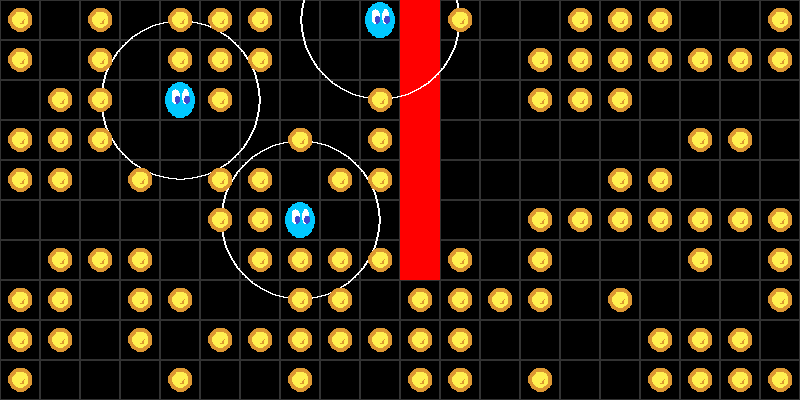

In [28]:
obstacle = BaseObstacle(10,0,1,7,color = RED)
agent_spawner = lambda x,y : CollectibleFinderAgent(x,y,color = (0,200,255),search_radius = 2,img_asset = "blob")
coll_spawner = lambda x,y : BaseCollectible(x,y,color = (220,150,50),img_asset = "ball")
 
# Setup grid
BOX_SIZE = 40
WIDTH = 20
HEIGHT = 10
env = GridEnvironment(WIDTH,HEIGHT,BOX_SIZE,show_grid = True,objects = [obstacle])
env.spawn(agent_spawner,3)
env.spawn(coll_spawner,100)
env.render()
env.get_img()

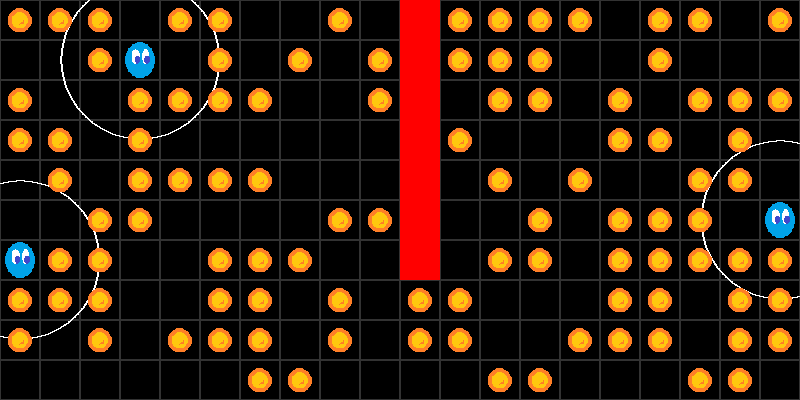

In [120]:
obstacle = BaseObstacle(10,0,1,7,color = RED)
agent_spawner = lambda x,y : CollectibleFinderAgent(x,y,color = GREEN,search_radius = 2,img_filepath = "sprites/sprite_blob.png",img_transparency = (200, 191, 231))
coll_spawner = lambda x,y : BaseCollectible(x,y,color = WHITE,circle = True,radius = 0.3,img_filepath = "sprites/sprite_ball2.png",img_transparency = (200, 191, 231))
 
# Setup grid
BOX_SIZE = 40
WIDTH = 20
HEIGHT = 10
env = GridEnvironment(WIDTH,HEIGHT,BOX_SIZE,show_grid = True,objects = [obstacle])
env.spawn(agent_spawner,3)
env.spawn(coll_spawner,100)
env.render()
env.get_img()

In [109]:
env.quit()

# Run simulation

In [109]:
sim = Simulation(env,fps = 30)

In [110]:
sim.run_episode(n_steps = 300,save = False,replay=True)

../..\westworld\algorithms\pathfinding\astar.py:141: UserWarning: Giving up on pathfinding too many iterations
  warnings.warn("Giving up on pathfinding too many iterations")


interactive(children=(Play(value=0, description='Press play', interval=200, max=300), Output()), _dom_classes=…

IntSlider(value=0, max=300)

In [155]:
agent1.pos

(3, 2)

In [166]:
agent1.rect

<rect(3, 2, 20, 20)>

In [ ]:
    
#     def render(self,screen = None):
#         ratio = 4
        
#         c,_ = agent1.collides(group,ratio = ratio,method = "circle")
#         if c:
#             color = RED
#         else:
#             color = WHITE
        
#         self.render_circle(radius = ratio,color = color,thickness = 1)
#         self.render_rect(ratio = ratio,color = color,center = True,thickness = 1)
#         super().render(screen)

In [149]:
from westworld.assets.sprites.blob import make_blob
from westworld.assets.sprites.ball import make_ball

In [160]:
x = make_ball((0,0,255),(0,200,200))

[autoreload of westworld.objects.rectangle failed: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\ProgramData\Anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../..\westworld\objects\rectangle.py", line 10, in <module>
    from ..assets.sprites import make_blob,make_ball
ImportError: cannot import name 'make_blob' from 'westworld.assets.sprites

In [161]:
x

array([[[200, 191, 231],
        [200, 191, 231],
        [200, 191, 231],
        ...,
        [200, 191, 231],
        [200, 191, 231],
        [200, 191, 231]],

       [[200, 191, 231],
        [200, 191, 231],
        [200, 191, 231],
        ...,
        [200, 191, 231],
        [200, 191, 231],
        [200, 191, 231]],

       [[200, 191, 231],
        [200, 191, 231],
        [200, 191, 231],
        ...,
        [200, 191, 231],
        [200, 191, 231],
        [200, 191, 231]],

       ...,

       [[200, 191, 231],
        [200, 191, 231],
        [200, 191, 231],
        ...,
        [200, 191, 231],
        [200, 191, 231],
        [200, 191, 231]],

       [[200, 191, 231],
        [200, 191, 231],
        [200, 191, 231],
        ...,
        [200, 191, 231],
        [200, 191, 231],
        [200, 191, 231]],

       [[200, 191, 231],
        [200, 191, 231],
        [200, 191, 231],
        ...,
        [200, 191, 231],
        [200, 191, 231],
        [200, 191, 231]]

In [163]:
import pygame
pygame.surfarray.make_surface(x)

<Surface(50x50x32 SW)>

In [147]:
x[:,:,:-1].tolist()

[[[200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231],
  [200, 191, 231]],
 [[200, 191, 231],
  [200, 191, 231],
  [200, 191